In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
import helper

In [2]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('../data/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
# ex feed-forward NN
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3121, grad_fn=<NllLossBackward>)


In [4]:
# TODO: Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

# TODO: Define the loss
criterion = nn.NLLLoss()

### Run this to check your work
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3396, grad_fn=<NllLossBackward>)


## Autograd

In [5]:
x = torch.rand(2,2, requires_grad=True)
print(x)

tensor([[0.6669, 0.0928],
        [0.1268, 0.1190]], requires_grad=True)


In [6]:
y = x**2
print(y)
print(y.grad_fn)

tensor([[0.4447, 0.0086],
        [0.0161, 0.0142]], grad_fn=<PowBackward0>)


In [7]:
z = y.mean()
print(z)
print(x.grad)

tensor(0.1209, grad_fn=<MeanBackward0>)
None


In [8]:
z.backward()
print(x/2)
print(x.grad)

tensor([[0.3334, 0.0464],
        [0.0634, 0.0595]], grad_fn=<DivBackward0>)
tensor([[0.3334, 0.0464],
        [0.0634, 0.0595]])


## Loss and Autograd togehter

In [9]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [10]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.0505e-03, -1.0505e-03, -1.0505e-03,  ..., -1.0505e-03,
         -1.0505e-03, -1.0505e-03],
        [-5.6027e-05, -5.6027e-05, -5.6027e-05,  ..., -5.6027e-05,
         -5.6027e-05, -5.6027e-05],
        [ 3.9234e-03,  3.9234e-03,  3.9234e-03,  ...,  3.9234e-03,
          3.9234e-03,  3.9234e-03],
        ...,
        [ 2.9559e-03,  2.9559e-03,  2.9559e-03,  ...,  2.9559e-03,
          2.9559e-03,  2.9559e-03],
        [-4.7992e-04, -4.7992e-04, -4.7992e-04,  ..., -4.7992e-04,
         -4.7992e-04, -4.7992e-04],
        [ 3.9082e-05,  3.9082e-05,  3.9082e-05,  ...,  3.9082e-05,
          3.9082e-05,  3.9082e-05]])


In [11]:
print(model.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)>


## Training the network

In [12]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0133, -0.0351, -0.0353,  ..., -0.0336,  0.0080, -0.0314],
        [-0.0038,  0.0150,  0.0322,  ...,  0.0337,  0.0114, -0.0043],
        [ 0.0128,  0.0154, -0.0003,  ...,  0.0304,  0.0188, -0.0228],
        ...,
        [ 0.0004, -0.0105,  0.0142,  ...,  0.0174, -0.0215,  0.0278],
        [ 0.0135,  0.0133,  0.0012,  ..., -0.0174,  0.0122, -0.0120],
        [ 0.0337, -0.0339, -0.0233,  ..., -0.0083, -0.0331,  0.0354]],
       requires_grad=True)
Gradient - tensor([[-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        ...,
        [-0.0063, -0.0063, -0.0063,  ..., -0.0063, -0.0063, -0.0063],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0133, -0.0350, -0.0353,  ..., -0.0336,  0.0080, -0.0314],
        [-0.0038,  0.0150,  0.0322,  ...,  0.0337,  0.0114, -0.0043],
        [ 0.0128,  0.0154, -0.0003,  ...,  0.0304,  0.0188, -0.0228],
        ...,
        [ 0.0005, -0.0104,  0.0142,  ...,  0.0174, -0.0214,  0.0279],
        [ 0.0135,  0.0133,  0.0012,  ..., -0.0174,  0.0122, -0.0120],
        [ 0.0337, -0.0339, -0.0233,  ..., -0.0083, -0.0331,  0.0354]],
       requires_grad=True)


## Training loop

In [15]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()
        output = model(images)        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss: %.4f" % (running_loss / len(trainloader)))

Training loss: 1.9664
Training loss: 0.8999
Training loss: 0.5365
Training loss: 0.4328
Training loss: 0.3861


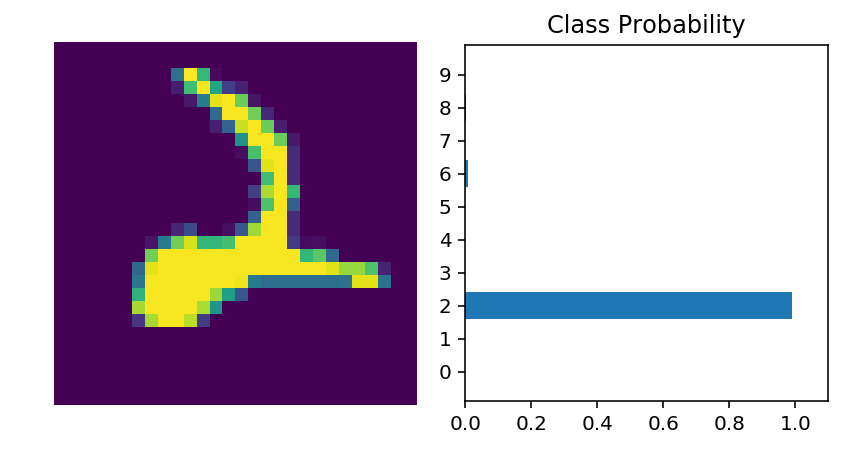

In [16]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)